In [1]:
import os
import importlib
import logging
importlib.reload(logging)
import framework
importlib.reload(framework)
import infer_bert_classifier
importlib.reload(infer_bert_classifier)
import bert_utils
importlib.reload(bert_utils)
from framework import *
import pandas as pd
import time
# Define some constants and configurations
logging.getLogger().setLevel(logging.INFO)

ACCESS_TOKEN = 'WUpGevbWC9lsnTW8quNUtmWRdAEM89'

Using TensorFlow backend.


Set up the task details. This notebook handles NER (for labeling person and company names)

In [2]:
DATASET = 'omf-paystubs' # supports w2 and resume
TASK_CONFIG = {
    'task': 'cmp_name',
}

task = Task(TASK_CONFIG)

Set paths for datasets and goldens (local or ib, both work).
Specify configurations

In [3]:
OMF_DATA = [
    'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch1/out/s3_map_records/',
    # 'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch2/out/s3_map_records/',
    # 'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch3/out/s1_process_files/',
    # 'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch4/out/s1_process_files/'
]
OMF_GOLDEN = [
    './omf_batch_1.csv',
    # './omf_batch_2.csv',
    # './omf_batch_3.csv',
    # './omf_batch_4.csv'
]

GOLDEN_CONFIG = {
    'path': OMF_GOLDEN,
    'is_local': True,
    'index_field_name':'filename',
    'file_type': 'csv',
    'identifier': 'file'
}
DATASET_CONFIG = {
    'path': OMF_DATA,
    'is_local': False, 
    'file_type': 'ibdoc',
    'identifier': lambda path: os.path.basename(path).split('.ibdoc')[0],
    'convert2txt': False
}


data = DataCuration(ACCESS_TOKEN, DATASET_CONFIG, GOLDEN_CONFIG)

INFO:root:Loading dataset from ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch1/out/s3_map_records/
INFO:root:101 files loaded
INFO:root:Loading goldens from ./omf_batch_1.csv
INFO:root:Goldens have non-unique filenames, keeping only the first values
INFO:root:Total files Goldens: (117, 17)
INFO:root:Total files found in the source with unique index: (101, 17)


In [4]:
data.dataset

{'APPELF__0089-000000009025750-00892881_&I100PYSTB_20191017005144_01000059-09025750-00892881-001_19_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0x10c961048>,
 'APPELF__0093-000000009062560-00932811_&I100PYSTB_20191009185526_03000640-09062560-00932811-001_20_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0x1534f62e8>,
 'APPELF__0093-000000009062560-00932811_&I100PYSTB_20191009185526_03000640-09062560-00932811-002_26_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0x1534f6080>,
 'APPELF__0119-000000009035480-01192741_&I100PYSTB_20191003000906_05500019-09035480-01192741-001_2_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0x1534f6400>,
 'APPELF__0222-000000009033200-02222771_&I100PYSTB_20191007185720_09000315-09033200-02222771-001_24_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0x1534f6550>,
 'APPELF__0222-000000009033200-02222771_&I100PYSTB_20191007185720_09000315-09033200-02222771-002_22_.pdf': <instabase.ocr.client.libs.ibocr.ParsedIBOCR at 0

In [5]:
# ToDo: add ModelSelection() hyperparameter search in the framework

DATA_ARGS = {
    'task': task,
    'dataset': data,
    'data_config': {
        'max_num_tokens': 5,
        'max_token_distance': None,
        'embedding_type': 'bert',
        'cardinal_only': False,
        'balance_targets': True,
        'additional_features': [],
        'pre_processing': ['lower_case', 'remove_punc']
    }
}

TRAINING_ARGS = {
    'batch_size': 32,
    'epochs': 25, 
}


start = time.time()

fe = FeatureEngineering_MLP(DATA_ARGS)

samples = fe.create_train_test_data()
print('Input shape: {}'.format(samples[0].shape))




INFO:root:expected field: Warrior Met Coal Mining, LLC, type: <class 'str'>
INFO:root:Building BERT embeddings
-------------------------
FINISHED LOADING MODEL
[WE] warrior
[WE] met
[WE] mining
[WE] coal
[WE] llc
[WE] employee
[WE] gross
[WE] 99999
[WE] 999999
[WE] hours
[WE] tucker
[WE] company
[WE] 9999999999999999
[WE] dates
[WE] worked
[WE] pto
[WE] mpp
[WE] regular
[WE] 999k
[WE] ytd
[WE] amount
[WE] description
[WE] 9999
[WE] 9
[WE] rate
[WE] check
[WE] end
[WE] date
[WE] 99999999
[WE] deductions
[WE] bank
[WE] fargo
[WE] wells
[WE] withholding
[WE] 9999999
[WE] post
[WE] employer
[WE] eap
[WE] medical
[WE] insurance
[WE] paid
[WE] status
[WE] marital
[WE] number
[WE] net
[WE] federal
[WE] information
[WE] 
INFO:root:expected field: Maricopa County, type: <class 'str'>
[WE] account
-------------------------
[WE] county
[WE] maricopa
[WE] lifesecurian
[WE] 999
[WE] advice
[WE] jefferson
[WE] pcspka
[WE] 999999999
[WE] taxable
[WE] st
[WE] 9999999999
[WE] phoenix
[WE] suite
[WE] az

AttributeError: 'ModelTrainer' object has no attribute 'train'

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
INFO:root:Training multilayer perceptron model for 578 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Train on 578 samples, validate on 248 samples
Epoch 1/25
578/578 [==============================] - 3s 6ms/step - loss: 2.1965 - accuracy: 0.5934 - val_loss: 0.5863 - val_accuracy: 0.7460
Epoch 2/25
578/578 [==============================] - 3s 5ms/step - loss: 1.7269 - accuracy: 0.7007 - val_loss: 0.5874 - val_accuracy: 0.7258
Epoch 3/25
578/578 [==============================] - 3s 5ms/step - loss: 1.2693 - accuracy: 0.6817 - val_loss: 0.4387 - val_accuracy: 0.8024
Epoch 4/25
578/578 [==============================] - 3s 5ms/step - loss: 0.9178 - accuracy: 0.7145 - val_loss: 0.4703 - val_accuracy: 0.8024
Epoch 5/25
578/578 [==============================] - 3s 5ms/step - loss: 0.5808 - 

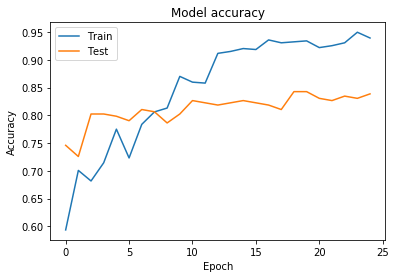

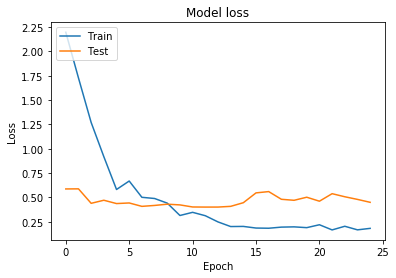

NameError: name 'context' is not defined

In [7]:
model = MLP(TRAINING_ARGS)
model.train(*samples)
acc = model.evaluate()
logging.info("Accuracy is {}".format(acc))

0.8387096524238586